In [21]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt

warnings.filterwarnings("ignore")

In [22]:
# data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\res_theo_exp1.csv")
data=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_all_no_noise.csv")
data.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data=data[data.pxt<=0.06]
data=data.drop_duplicates()
print(data.shape)

(169271, 28)


In [23]:
data2=pd.read_csv(r"C:\Workplace\Python\AnalysisForThePaper\NEH\second_round\D2O_NEH\sim_i1_noise.csv")
data2.columns=['pep','a','b','cpxt','pxt','neh','cneh','b1','b2','b3','a1','a2','delta1','delta2','rmse',
             'a20','a21','a22','a23',
             'b20','b21','b22','b23','b24','b25','i0','i1','i2']
data2=data2[data2.pxt<=0.06]
data2=data2.drop_duplicates()
print(data2.shape)

(169271, 28)


In [24]:
data=data[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2','neh']]
data2=data2[['pep','cpxt','pxt','delta1','delta2','i0','i1','i2','neh']]

temp_merged=data.merge(data2,on=['pep','pxt'])
print(temp_merged.shape)


(169271, 16)


In [25]:
def new_pxt(delta2_x,delta1_x,i1_x,i0_x):
    return 1 +((delta1_x*0.5)/( (delta2_x) - (delta1_x*i1_x/i0_x) + (0.5*delta1_x*delta1_x) - 0.5*delta1_x))

AVTEQGHELSNEER 0.0014110891380789692 0.0011


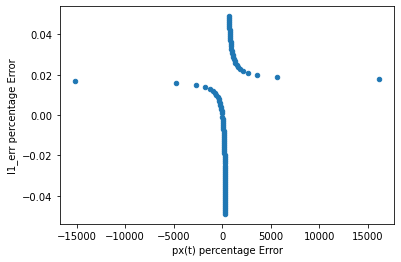

AVTEQGHELSNEER 0.002410778229028687 0.0021


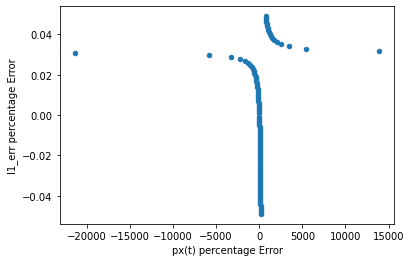

AVTEQGHELSNEER 0.003410467631378533 0.0031


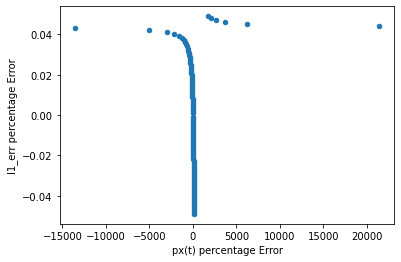

AVTEQGHELSNEER 0.004410157345117627 0.0041


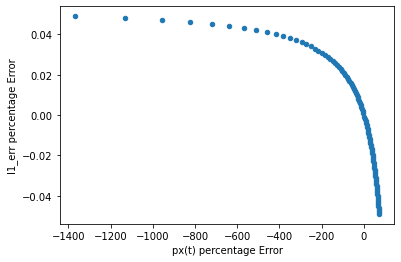

AVTEQGHELSNEER 0.00540984737022554 0.0051


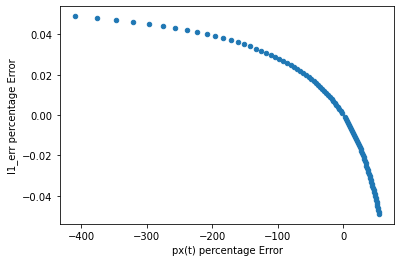

AVTEQGHELSNEER 0.006409537706726809 0.0061


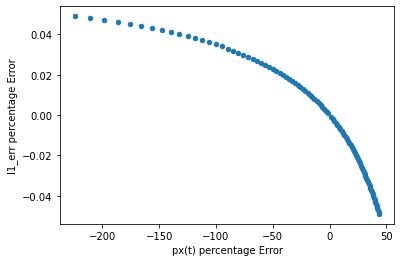

AVTEQGHELSNEER 0.0074092283545974524 0.0071


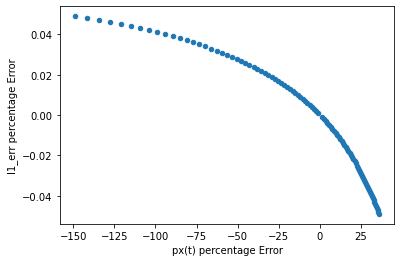

AVTEQGHELSNEER 0.008408919313868557 0.0081


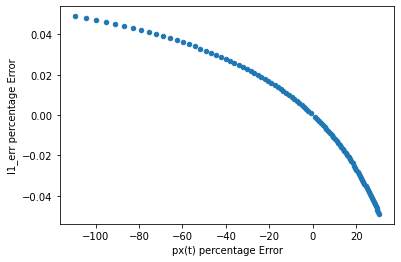

AVTEQGHELSNEER 0.009408610584514587 0.0091


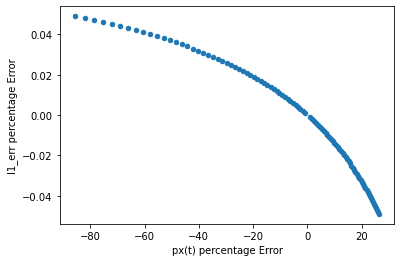

AVTEQGHELSNEER 0.010408302166546646 0.0101


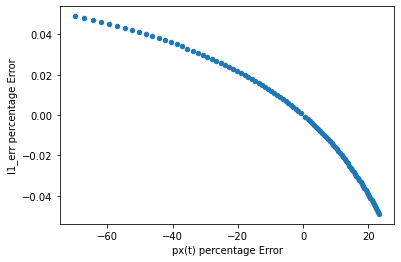

AVTEQGHELSNEER 0.011407994059957072 0.0111


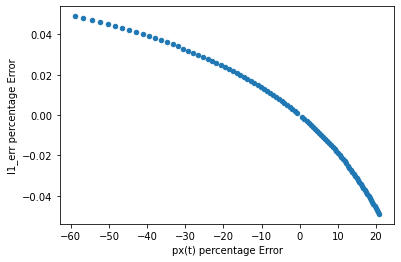

AVTEQGHELSNEER 0.012407686264769069 0.0121


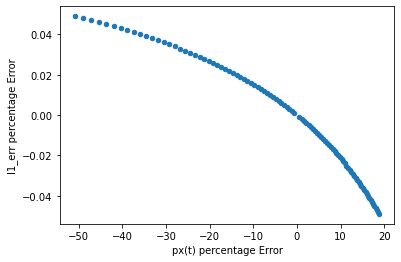

AVTEQGHELSNEER 0.013407378780948331 0.0131


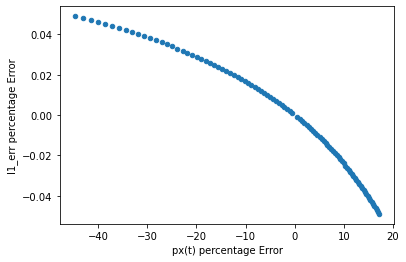

AVTEQGHELSNEER 0.014407071608526278 0.0141


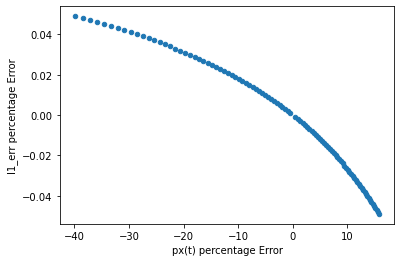

AVTEQGHELSNEER 0.015406764747482704 0.0151


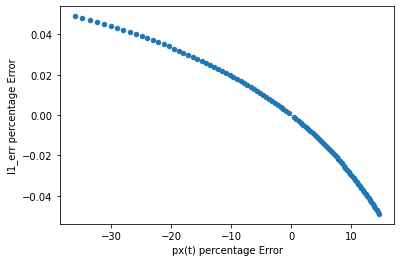

AVTEQGHELSNEER 0.01640645819782327 0.0161


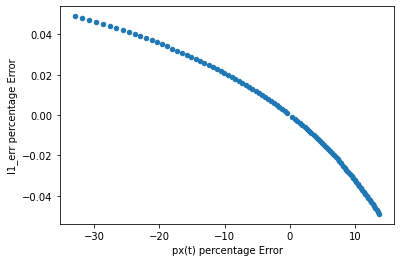

AVTEQGHELSNEER 0.017406151959548977 0.0171


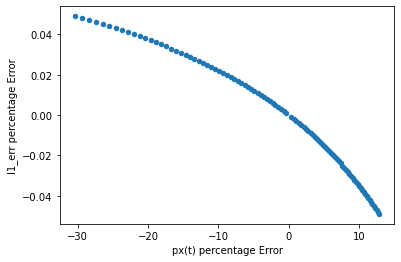

AVTEQGHELSNEER 0.018405846032666262 0.0181


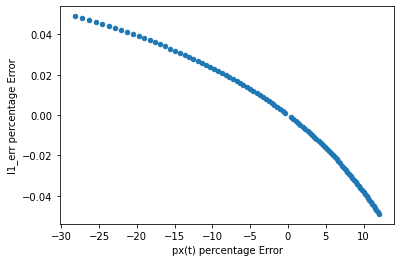

AVTEQGHELSNEER 0.019405540417156586 0.0191


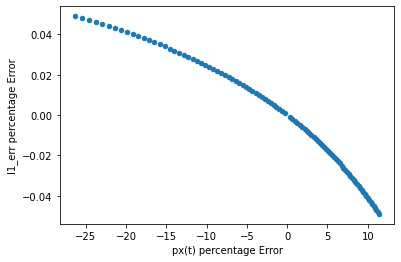

AVTEQGHELSNEER 0.020405235113058362 0.0201


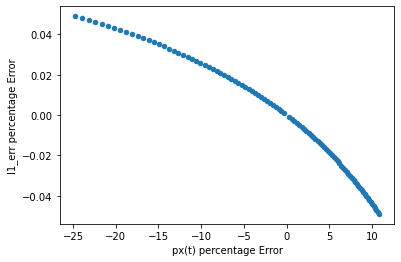

AVTEQGHELSNEER 0.021404930120321075 0.0211


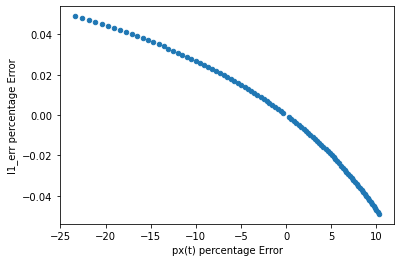

AVTEQGHELSNEER 0.02240462543898203 0.0221


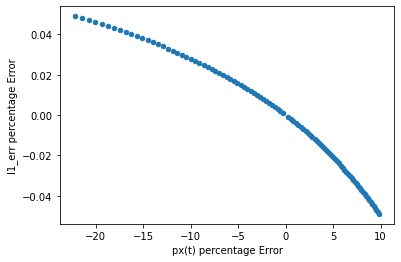

AVTEQGHELSNEER 0.023404321069022127 0.0231


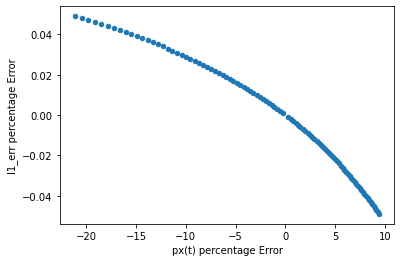

AVTEQGHELSNEER 0.024404017010458023 0.0241


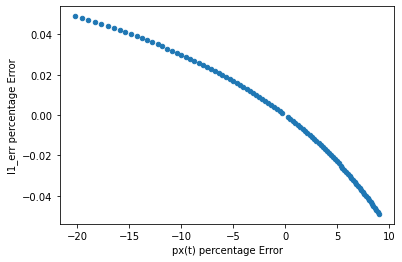

AVTEQGHELSNEER 0.025403713263265515 0.0251


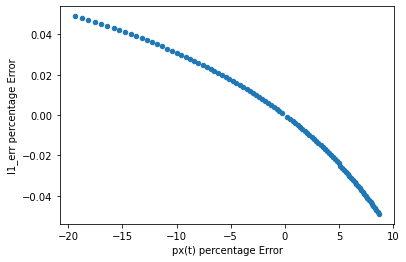

AVTEQGHELSNEER 0.02640340982747147 0.0261


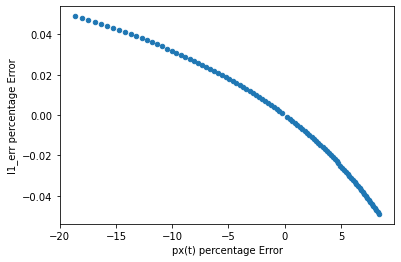

AVTEQGHELSNEER 0.0274031067030579 0.0271


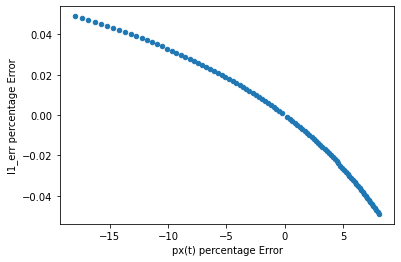

AVTEQGHELSNEER 0.028402803890035355 0.0281


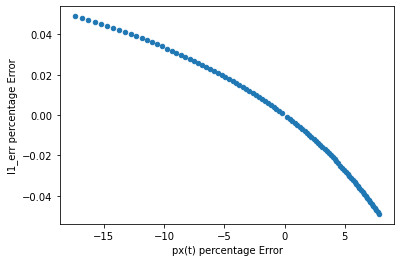

AVTEQGHELSNEER 0.0294025013883894 0.0291


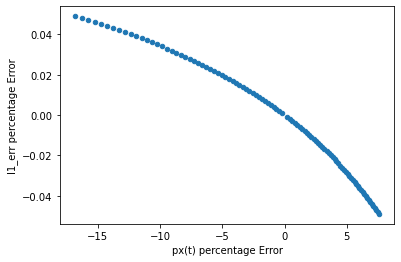

AVTEQGHELSNEER 0.030402199198144797 0.0301


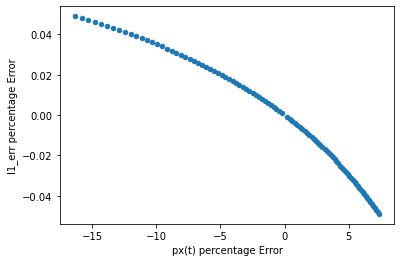

AVTEQGHELSNEER 0.03140189731929588 0.0311


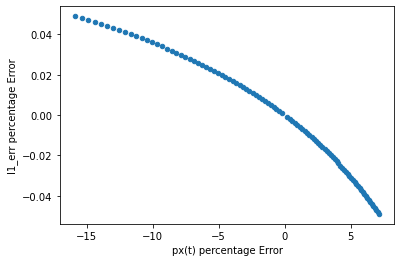

AVTEQGHELSNEER 0.03240159575181745 0.0321


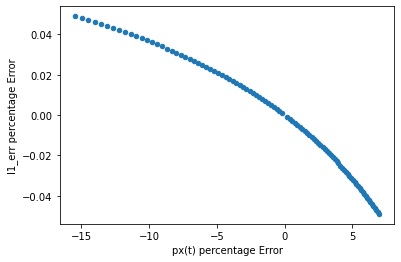

AVTEQGHELSNEER 0.033401294495756795 0.0331


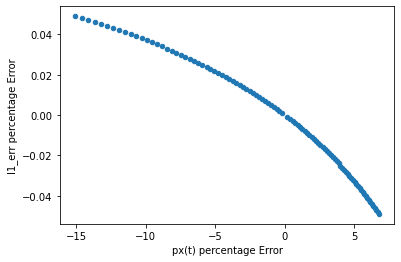

AVTEQGHELSNEER 0.0344009935510059 0.0341


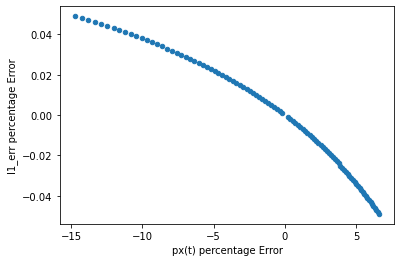

AVTEQGHELSNEER 0.035400692917728405 0.0351


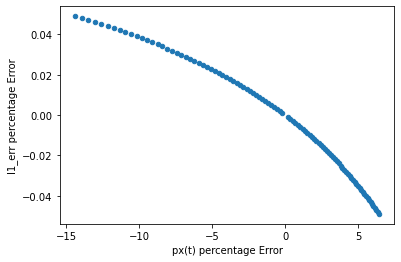

AVTEQGHELSNEER 0.03640039259578165 0.0361


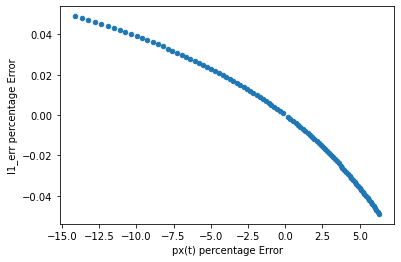

AVTEQGHELSNEER 0.03740009258525945 0.0371


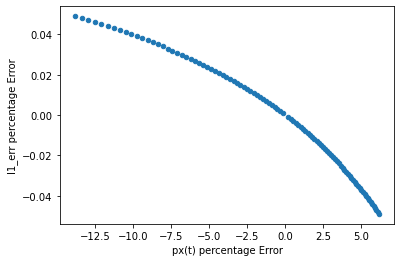

AVTEQGHELSNEER 0.03839979288610551 0.0381


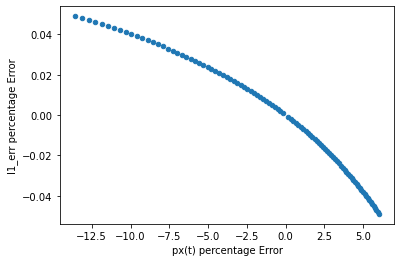

AVTEQGHELSNEER 0.03939949349835814 0.0391


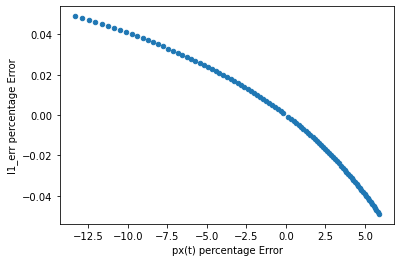

AVTEQGHELSNEER 0.040399194421984475 0.0401


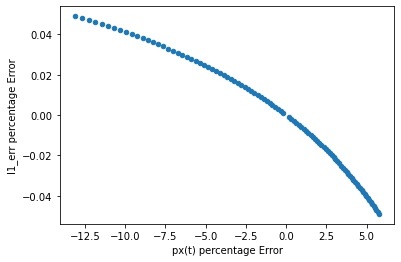

AVTEQGHELSNEER 0.04139889565700239 0.0411


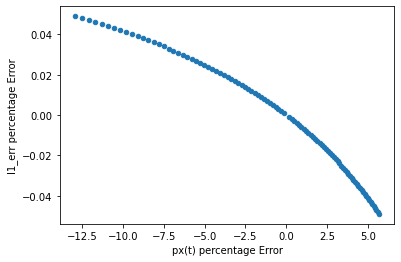

AVTEQGHELSNEER 0.042398597203409105 0.0421


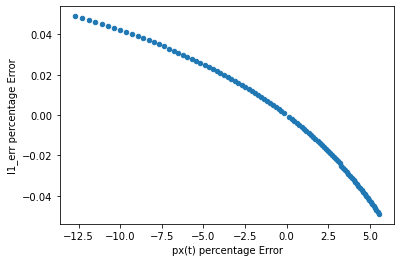

AVTEQGHELSNEER 0.043398299061201184 0.0431


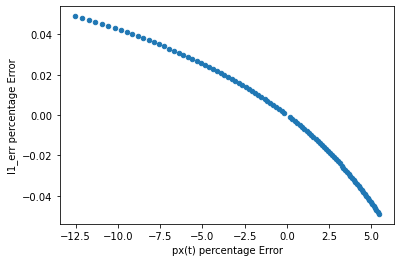

AVTEQGHELSNEER 0.04439800123038762 0.0441


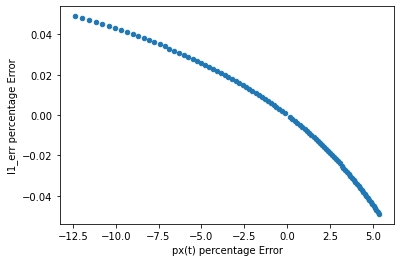

AVTEQGHELSNEER 0.04539770371096086 0.0451


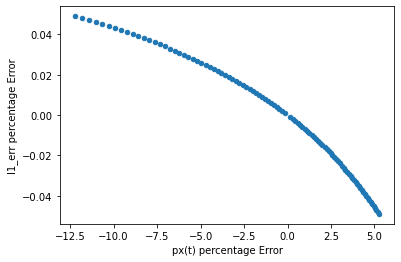

AVTEQGHELSNEER 0.04639740650293667 0.0461


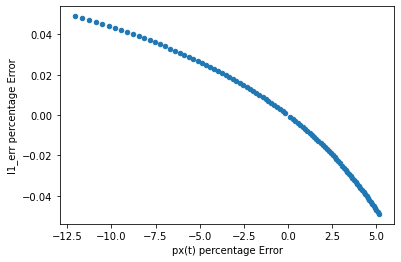

AVTEQGHELSNEER 0.04739710960630106 0.0471


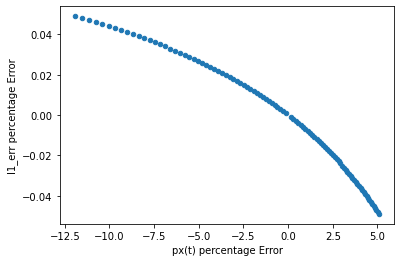

AVTEQGHELSNEER 0.048396813021060026 0.0481


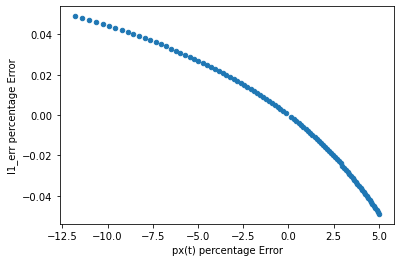

AVTEQGHELSNEER 0.04939651674717782 0.0491


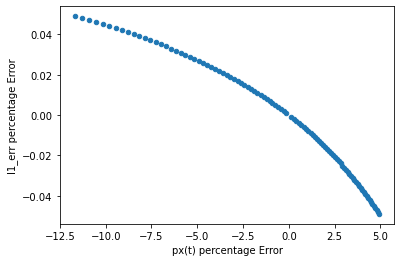

AVTEQGHELSNEER 0.050396220784703405 0.0501


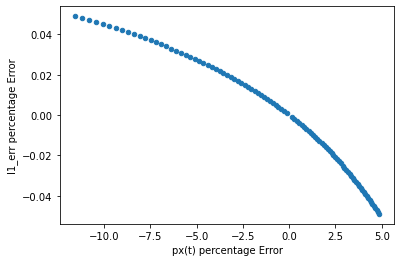

AVTEQGHELSNEER 0.05139592513363389 0.0511


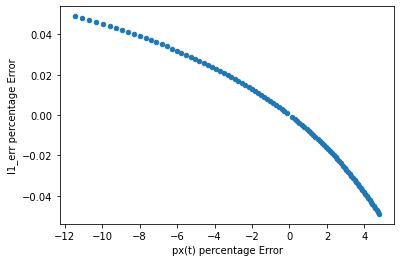

AVTEQGHELSNEER 0.052395629793946186 0.0521


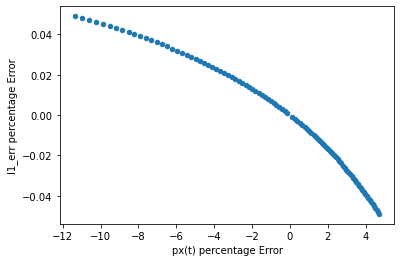

AVTEQGHELSNEER 0.05339533476564373 0.0531


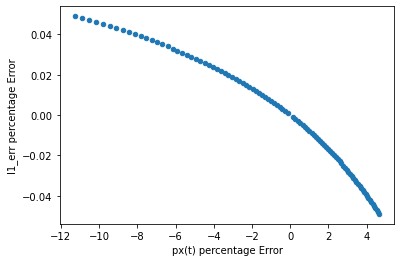

AVTEQGHELSNEER 0.054395040048696 0.0541


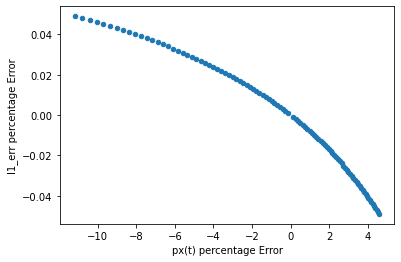

AVTEQGHELSNEER 0.05539474564320224 0.0551


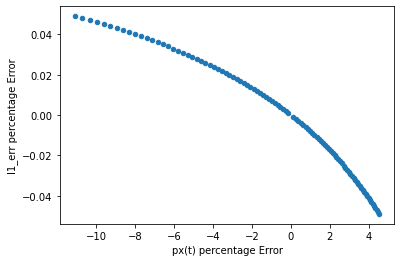

AVTEQGHELSNEER 0.056394451549065305 0.0561


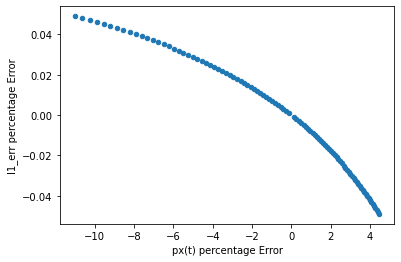

AVTEQGHELSNEER 0.05739415776633139 0.0571


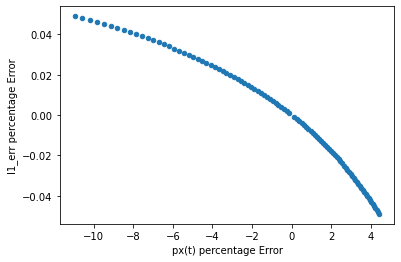

AVTEQGHELSNEER 0.058393864294972175 0.0581


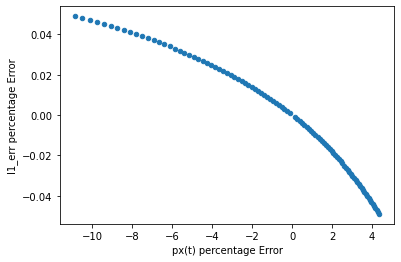

AVTEQGHELSNEER 0.05939357113502286 0.0591


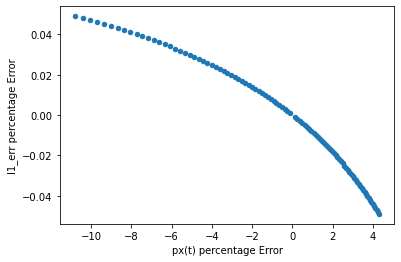

In [6]:
i=2
for k in range(i*59,i*59+59):
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
    temp_merged

    temp_res=[]
    temp_pxt=[]
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        i1_0_i0_0=(i1_x/i0_x) - delta1_x   

        x=i1_x
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x) 
        print(temp_merged.pep[0],ccpxt,pxt)

        for i in range(1,50):    

            xs.append(x+i*x/1000)   
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)

            xs.append(x-i*x/1000)
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)

    df=pd.DataFrame([temp_pxt,temp_res]).transpose()
    df.columns=['pxt_err','I1_err']
    # df=df[ df['xs']<20 ]
    plt.scatter(df['pxt_err'],df.I1_err,s=20)
    plt.xlabel("px(t) percentage Error")
    plt.ylabel("I1_err percentage Error")
    plt.show()

In [117]:
all_res=[]
i=10
for k in range(i*59,i*59+59):#35,36):#20,21):#59
    
    temp_merged=data.merge(data2,on=['pep','pxt'])
    temp_merged=temp_merged.loc[k:k,:]
    temp_merged=temp_merged.reset_index(drop=True)
#     print(k,temp_merged.pep)
    
    temp_res=[]
    temp_pxt=[]
    temp_apxt=[]
    for index in range(1):#temp_merged.shape[0]):
        pxt        =temp_merged.pxt[index]
        delta2_x   =temp_merged.delta2_x[index]
        delta1_x   =temp_merged.delta1_x[index]
        i1_x       =temp_merged.i1_x    [index]
        i0_x       =temp_merged.i0_x    [index]
        i2_x       =temp_merged.i2_x    [index]
        
        i1_0_i0_0=(i1_x/i0_x) - delta1_x   
        x=i1_x
        
        res=[]
        xs=[]
        ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x)  
         
        for i in range(1,50):  
            
            xs.append(x+i*x/1000)   
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
            temp_res.append( (x - (x+i*x/1000))/x)
            temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)

            xs.append(x-i*x/1000)
            temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
            temp_res.append( (x - (x -i*x/1000))/x)
            temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
            temp_apxt.append(ccpxt)
             
    all_res.append([temp_res,temp_pxt,temp_apxt])
     
df=pd.DataFrame()
for x in all_res:
    df=pd.concat([df,pd.DataFrame(x)],axis=1)
df=df.transpose()
df.columns=['I1_err','pxt_err','pxt'] 

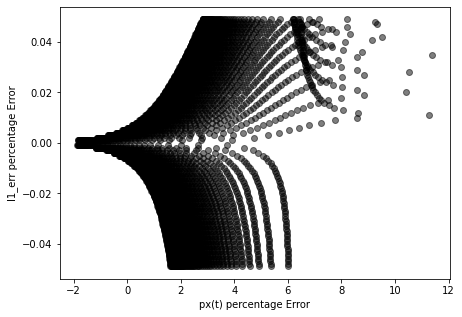

In [118]:
plt.figure(figsize=(7,5))
# plt.scatter(df.pxt_err,df.I1_err,c='k',alpha=0.5)
plt.scatter([math.log(abs(x)) for x in df.pxt_err],df.I1_err,c='k',alpha=0.5)
plt.xlabel("px(t) percentage Error")
plt.ylabel("I1_err percentage Error")
plt.show()

<Figure size 432x288 with 0 Axes>

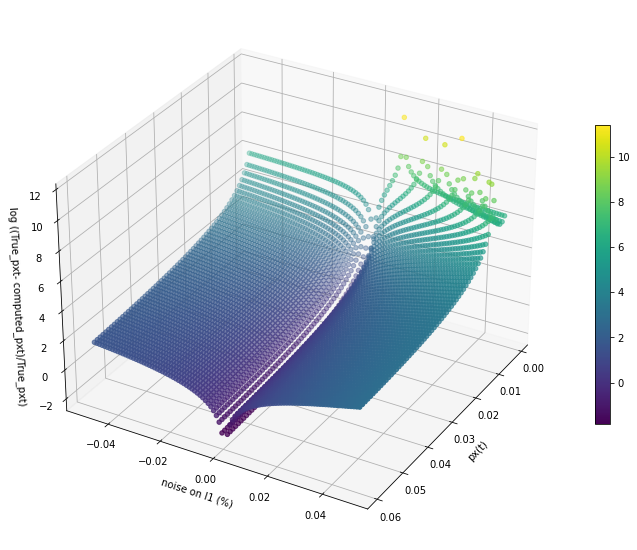

In [119]:
# plt.figure(figsize=(7,5))
# plt.scatter(df.pxt_err,df.I1_err,c='k',alpha=0.5)
# plt.xlabel("px(t) percentage Error")
# plt.ylabel("I1_err percentage Error")
# plt.show()

import math
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colorbar as colorbar
from matplotlib.cm import coolwarm

fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt
y = df.I1_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)")
plt.ylabel("noise on I1 (%)")
ax.set_zlabel("log ((True_pxt- computed_pxt)/True_pxt)")
ax.view_init(30,30)
plt.show()

In [120]:
temp_res=[]
temp_pxt=[]
temp_apxt=[]
temp_neh=[]
temp_merged_all=data.merge(data2,on=['pep','pxt','neh'])
for i in range(10):
    print(i)
    for k in range(i*59,i*59+59):#35,36):#20,21):#59
        
        temp_merged=temp_merged_all.loc[k:k,:]
        temp_merged=temp_merged.reset_index(drop=True)
        
        for index in range(1):#temp_merged.shape[0]):
            pxt        =temp_merged.pxt[index]
            delta2_x   =temp_merged.delta2_x[index]
            delta1_x   =temp_merged.delta1_x[index]
            i1_x       =temp_merged.i1_x    [index]
            i0_x       =temp_merged.i0_x    [index]
            i2_x       =temp_merged.i2_x    [index]
            neh        =temp_merged.neh     [index]

            i1_0_i0_0=(i1_x/i0_x) - delta1_x   
            x=i1_x

            res=[]
            xs=[]
            ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x)  

            for i in range(1,50):  

                xs.append(x+i*x/1000)   
                temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
                temp_res.append( (x - (x+i*x/1000))/x)
                temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
                temp_apxt.append(ccpxt)
                temp_neh.append(neh)
                temp_neh

                xs.append(x-i*x/1000)
                temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
                temp_res.append( (x - (x -i*x/1000))/x)
                temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
                temp_apxt.append(ccpxt)
                temp_neh.append(neh)
                

    

0
1
2
3
4
5
6
7
8
9


In [121]:
df=pd.DataFrame() 
df["I1_err"]=temp_res
df["pxt_err"]=temp_pxt
df["pxt"]=temp_apxt
df["neh"]=temp_neh
print(df.shape)

(57820, 4)


<Figure size 432x288 with 0 Axes>

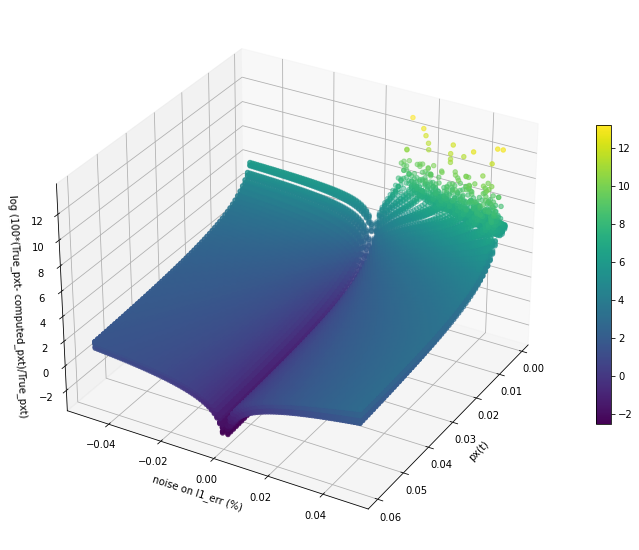

In [122]:
fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt
y = df.I1_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)")
plt.ylabel("noise on I1_err (%)")
ax.set_zlabel("log (100*(True_pxt- computed_pxt)/True_pxt)")
ax.view_init(30,30)

plt.show()

<Figure size 432x288 with 0 Axes>

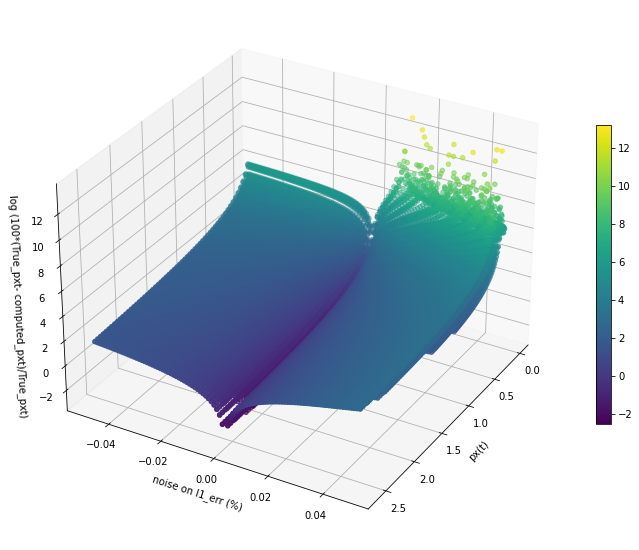

In [123]:
fig = plt.figure()
plt.figure(figsize=(12,10))
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
 
# defining all 3 axis
z = [math.log(abs(x)) for x in df.pxt_err]
x = df.pxt*df.neh
y = df.I1_err
 
# plotting
c = z
im=ax.scatter(x, y, z, c = c)
plt.colorbar(im,ax=ax,shrink =0.55 ) 

plt.xlabel("px(t)")
plt.ylabel("noise on I1_err (%)")
ax.set_zlabel("log (100*(True_pxt- computed_pxt)/True_pxt)")
ax.view_init(30,30)

plt.show()

In [124]:
temp_res=[]
temp_pxt=[]
temp_apxt=[]
temp_neh=[]
temp_merged_all=data.merge(data2,on=['pep','pxt','neh'])
for i in range(10):
    print(i)
    for k in range(i*59,i*59+59):#35,36):#20,21):#59
        
        temp_merged=temp_merged_all.loc[k:k,:]
        temp_merged=temp_merged.reset_index(drop=True)
        
        for index in range(1):#temp_merged.shape[0]):
            pxt        =temp_merged.pxt[index]
            delta2_x   =temp_merged.delta2_x[index]
            delta1_x   =temp_merged.delta1_x[index]
            i1_x       =temp_merged.i1_x    [index]
            i0_x       =temp_merged.i0_x    [index]
            i2_x       =temp_merged.i2_x    [index]
            neh        =temp_merged.neh     [index]

            i1_0_i0_0=(i1_x/i0_x) - delta1_x   
            x=i1_x

            res=[]
            xs=[]
            ccpxt=new_pxt(delta2_x,delta1_x,i1_x,i0_x)  

            for i in range(0,51):  

                xs.append(x+i*x/1000)   
                temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
                temp_res.append( (x - (x+i*x/1000))/x)
                temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
                temp_apxt.append(ccpxt)
                temp_neh.append(neh)
                temp_neh

                xs.append(x-i*x/1000)
                temp_delta1_x= xs[-1]/i0_x - i1_0_i0_0
                temp_res.append( (x - (x -i*x/1000))/x)
                temp_pxt.append( (new_pxt(delta2_x,temp_delta1_x,xs[-1],i0_x) -ccpxt)/ccpxt)
                temp_apxt.append(ccpxt)
                temp_neh.append(neh)
                

df=pd.DataFrame() 
df["I1_err"]=temp_res
df["pxt_err"]=temp_pxt
df["pxt"]=temp_apxt
df["neh"]=temp_neh
print(df.shape)  

0
1
2
3
4
5
6
7
8
9
(60180, 4)


In [125]:
np.unique(df.I1_err)

array([-0.05, -0.05, -0.05, ...,  0.05,  0.05,  0.05])

In [126]:
df.pxt=df["pxt"]=[round(x,3) for x in df.pxt]
df.I1_err=[round(x,4) for x in abs(df.I1_err)]

plot_data=df.query('abs(I1_err) in [0,0.01,0.03,0.05] and pxt in [0.001,0.005,0.01,0.020,0.030,0.040,0.050]').drop_duplicates()
plot_data.I1_err=abs(plot_data.I1_err)
plot_data.pxt_err=abs(plot_data.pxt_err)
plot_data.head(5)

,I1_err,pxt_err,pxt,neh
0,0.00,1.573569e-13,0.001,16
20,0.01,1.907083e+02,0.001,16
21,0.01,3.055144e+03,0.001,16
60,0.03,2.964815e+02,0.001,16
61,0.03,6.477438e+02,0.001,16


In [127]:
plot_data=plot_data[['I1_err','pxt_err','pxt']].groupby(by=["pxt","I1_err"]).agg({'pxt_err':['mean','std']}).reset_index()
plot_data=plot_data.sort_values(by='pxt')
plot_data.head(50)

pxt I1_err       pxt_err              
                          mean           std
0   0.001   0.00  8.890665e-13  5.841430e-13
1   0.001   0.01  1.336328e+03  2.517692e+03
2   0.001   0.03  6.138004e+02  3.427333e+02
3   0.001   0.05  4.991938e+02  1.537577e+02
4   0.005   0.00  1.026113e-13  4.326473e-14
5   0.005   0.01  2.527835e+01  8.868855e+00
6   0.005   0.03  1.206148e+02  1.065561e+02
7   0.005   0.05  4.929311e+02  6.008582e+02
8   0.010   0.00  2.370379e-14  2.654798e-14
9   0.010   0.01  8.548956e+00  2.442099e+00
10  0.010   0.03  2.968582e+01  1.566181e+01
11  0.010   0.05  7.557372e+01  7.139319e+01
15  0.020   0.05  2.232835e+01  1.436182e+01
14  0.020   0.03  1.117725e+01  4.617697e+00
13  0.020   0.01  3.450380e+00  8.998755e-01
12  0.020   0.00  1.360218e-15  3.847279e-15
16  0.030   0.00  5.216836e-16  1.380245e-15
17  0.030   0.01  2.240681e+00  5.802941e-01
18  0.030   0.03  7.184347e+00  2.838498e+00
19  0.030   0.05  1.395425e+01  8.376013e+00
20  0.040   0.00  0.000000e+00  0.000000e+00
21  0.040   0.01  1.727277e+00  4.535322e-01
22  0.040   0.03  5.541957e+00  2.210383e+00
23  0.040   0.05  1.078329e+01  6.517584e+00
24  0.050   0.00  0.000000e+00  0.000000e+00
25  0.050   0.01  1.447443e+00  3.876371e-01
26  0.050   0.03  4.667508e+00  1.917562e+00
27  0.050   0.05  9.205566e+00  5.769094e+00

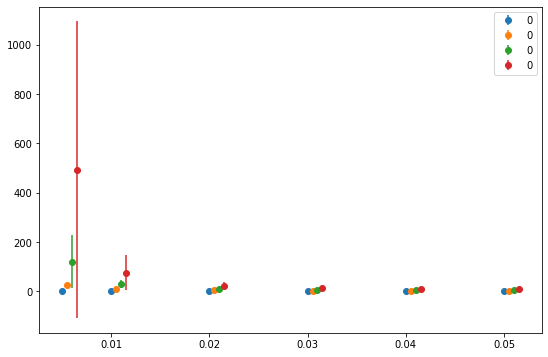

In [128]:
plt.figure(figsize=(9,6))
I1_errs=[0,0.01,0.03,0.05]
for i in range(len(delta_2_errs)) :
    I1_err=I1_errs[i]
    y=[]
    x=[]
    er=[]
    for pxt in [0.005,0.01,0.020,0.030,0.040,0.050]:
        temp=plot_data[(plot_data.pxt==pxt) &(plot_data.I1_err==I1_err)].reset_index(drop=True)
        temp.columns=['pxt','I1_err','avg','sd']
        temp
        # temp.loc['mean',0]
        y.append(float(temp.avg))
        x.append(pxt + i*5E-4)
        er.append(float(temp.sd))
    
                
    plt.errorbar(x, y, er, linestyle='None', marker='o',label=delta_2_err)
    
#     plt.show()
plt.legend()

In [80]:
pxt

0.005

In [81]:
I1_err

0